<a href="https://colab.research.google.com/github/Harlequelrah/Learning_data_analysis/blob/main/Learning_data_analysis/Courses/Partie_4/3-Analysez%20la%20corr%C3%A9lation%20entre%20deux%20variables%20quantitatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysez la corrélation entre deux variables quantitatives

Le diagramme de dispersion ou scatterplot est plus adapté à l'analyse de deux variables quantitatives , et le tableau de contingence à l'analyse de deux variables qualitatives .




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/Harlequelrah/Learning_data_analysis/refs/heads/main/Learning_data_analysis/data/operations.csv',parse_dates=[0])
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


# Diagramme de dispersion
Il est pas très parlant dans ce cas , ce serait mieux d'agréger la variable X en abscisse en différentes classes et représenter pour chaque tranche une boite à moustache.

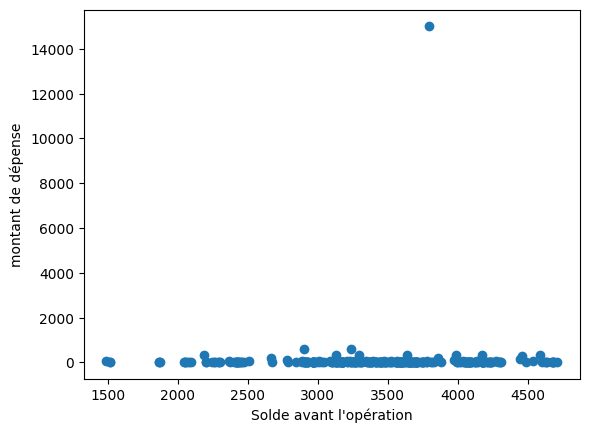

In [ ]:
depenses = data[data['montant']<0]
plt.plot(depenses["solde_avt_ope"],-depenses["montant"],'o')
plt.xlabel("Solde avant l'opération")
plt.ylabel("montant de dépense")
plt.show()

# La covariance empirique et le coefficient de corrélation

La covariance empirique se note S tel que $ S_{X,Y} = \frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$ .

## Propriété :
- $S_{X,Y} = S_{Y,X}$

- Si on crée une nouvelle variable Z  à partir de deux variables U et V dont on connait la covariance empirique et que Z = aU+bV alors
$ S_{X,Z} = a \cdot S_{X,U} + b \cdot S_{X,V} $ : il s'agit de la bilinéarité .

## Coefficient de corrélation:
On le note `r` et on l'appelle aussi coefficient de corrélation linéaire ou coefficient de corrélation de pearson

$r = \frac{S_{X,Y}}{S_X^2 S_Y^2}$

In [ ]:
# Coefficient de Pearson
import scipy.stats as st
pearson = st.pearsonr(depenses['solde_avt_ope'],-depenses['montant'])
print("Pearson : ",pearson[0])

# pearson[1] c'est le pv-value
# Si elle est inférieur à 0.05 la corrélation est significative sinon elle peut etre due au hasard

Pearson 0.03495679791618303


In [ ]:
# Covariance

cov = np.cov(depenses['solde_avt_ope'],-depenses['montant'],ddof=0)
print("Covariance : ",cov[1,0])

Covariance :  19929.942276393584
